# Pola untuk Mengindentifikasi Keberhasilan Suatu Game

# Konten <a id='contents'></a>

* [1 Gambaran Besar](#big_picture)
    * [1.1 Pendahuluan](#intro)
    * [1.2 Deskripsi Data](#data_description)
    * [1.3 Tujuan dan Langkah-Langkah Pengerjaan Projek](#goals_and_step)

* [2 Prapemrosesan Data](#data_preprocessing)
    * [2.1 Memuat Data](#load_data)
    * [2.2 Eksplorasi Data Awal](#initial_data_exploration)
    * [2.3 Kesimpulan dan Langkah-Langkah Selanjutnya](#initial_summary)
    
* [3 Menanggulangi Data yang Bermasalah](#deal_with_wrong_data)
    * [3.1 Menanggulangi Data yang Bermasalah Pada Kolom Name](#deal_with_wrong_data_name_column)
    * [3.2 Menanggulangi Data yang Bermasalah Pada Kolom Year_of_Release](#deal_with_wrong_data_year_of_release_column)
    * [3.3 Menanggulangi Data yang Bermasalah Pada Kolom Critic_Score](#deal_with_wrong_data_critic_score_column)
    * [3.4 Menanggulangi Data yang Bermasalah Pada Kolom User_Score](#deal_with_wrong_data_user_score_column)
    * [3.5 Menanggulangi Data yang Bermasalah Pada Kolom Rating](#deal_with_wrong_data_rating_column)
    * [3.6 Menghitung Jumlah Penjualan Tiap Daerah untuk Setiap Games](#total_sales_every_games_each_region)
    
* [4 Analisa Data](#data_analysis)
    * [4.1 Meninjau Jumlah Game yang dirilis Tiap Periode](#sum_of_games_released_per_year)
    * [4.2 Analisa Penjualan Platform](#platform_sales_analysis)
    * [4.3 Analisa Penjualan Platform per Tahun 2006](#>2006_platform_sales_analysis)
    * [4.4 Analisa Korelasi Penjualan dengan Penilaian](#sales_vs_score_correlation)
    
* [5 Pemrofilan Pengguna per Wilayah](#user_profiling_by_region)
    * [5.1 Meninjau Jumlah Game yang dirilis Tiap Periode](#top_platform_by_region)
    * [5.2 Genre Teratas Berdasarkan Wilayah](#top_genre_by_region)
    * [5.3 Pengaruh Rating ESRB](#esrb_rating_impact)
    
* [6 Menguji Hipotesis](#hypotesis_testing)
    * [6.1 Rata-rata Rating Pengguna Platform Xbox One dan PC adalah Sama](#user_score_for_xone_pc)
    * [6.2 Rata-rata Rating Pengguna Genre Action dan Sports adalah Sama](#user_score_for_action_sports)

* [7 Kesimpulan](#summary)

## Gambaran Besar <a id='big_picture'></a>

### Pendahuluan <a id='intro'></a>

Toko daring "Ice" yang menjual video game dari seluruh dunia memiliki data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Tujuan dari analisis ini adalah mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak. Dengan begitu, Tim Marketing dapat merencanakan kampanye iklannya untuk game yang paling berpotensial.

**Catatan:**

Dataset ini memuat singkatan. ESRB merupakan singkatan dari Entertainment Software Rating Board, yakni sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

### Deskripsi Data <a id='data_description'></a>

**Tabel Games:**

- Name (nama)
- Platform
- Year_of_Release (tahun rilis)
- Genre
- NA_sales (penjualan di Amerika Utara dalam satuan juta USD)
- EU_sales (penjualan di Eropa dalam satuan juta USD)
- JP_sales (penjualan di Jepang dalam satuan juta USD)
- Other_sales (penjualan di negara lainnya dalam satuan juta USD)
- Critic_Score (skor ulasan dari kritikus, maksimal 100)
- User_Score (skor ulasan dari pengguna, maksimal 10)
- Rating (ESRB)

**Data untuk tahun 2016 mungkin tidak lengkap.**

### Tujuan dan Langkah-Langkah Pengerjaan Projek <a id='goals_and_step'></a>

**Tujuan dari proyek ini adalah menemukan pola untuk mengindentifikasi keberhasilan suatu games**

**Langkah yang akan saya lakukan**
1. Mempelajari data dari tiap tabel 
2. Melakukan perbaikan pada data (baik perubahan format, pengisian nilai yang hilang, maupun eliminasi data)
3. Melakukan analisis data eksploratif
4. Melakukan pengujian hipotesis
5. Membuat kesimpulan terkait dari analisis data yang dilakukan

## Pra Pemrosesan Data <a id='data_preprocessing'></a>

In [ ]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Memuat Data <a id='load_data'></a>

In [ ]:
# Muat file data menjadi DataFrame
df = pd.read_csv('/datasets/games.csv')

### Eksplorasi Data Awal <a id='initial_data_exploration'></a>

In [ ]:
# Menampilkan sample data untuk melihat data secara sekilas
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4350,NBA Live 2005,GC,2004.0,Sports,0.35,0.09,0.00,0.01,83.0,6.7,E
407,Star Wars Episode III: Revenge of the Sith,PS2,2005.0,Action,1.47,1.39,0.03,0.43,60.0,7.2,T
2034,Skylanders SWAP Force,PS3,2013.0,Platform,0.43,0.42,0.00,0.17,83.0,5.3,E10+
2377,Madden NFL 08,Wii,2007.0,Sports,0.80,0.00,0.00,0.07,76.0,6.8,E
6396,Dragon Age Origins: Awakening,PS3,2010.0,Role-Playing,0.24,0.00,0.00,0.02,NaN,NaN,NaN
16602,"Transformers: War for Cybertron (XBox 360, PS3...",PC,2010.0,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,NaN
6051,Puzzle Quest: Challenge of the Warlords,Wii,2007.0,Puzzle,0.26,0.00,0.00,0.02,71.0,6.2,E10+
683,Mario Tennis,N64,2000.0,Sports,0.78,0.40,1.06,0.07,NaN,NaN,NaN
11315,Marvel Nemesis: Rise of the Imperfects,DS,2005.0,Fighting,0.08,0.00,0.00,0.01,34.0,6.5,E10+
10575,Karaoke Revolution,PS3,2009.0,Misc,0.07,0.02,0.00,0.01,66.0,tbd,T


In [ ]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Memampilkan nilai statistik dari kolom numerik
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
# Melakukan pengecekan nilai unik disetiap kolom
df.nunique()

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

### Kesimpulan Awal dan Langkah-Langkah Analisis Selanjutnya <a id='initial_summary'></a>

**Insights:**
1. Terdapat nama kolom yang memiliki kombinasi uppercase dan lowercase sehingga harus dibenahi agar tidak menimbulkan kesalahan saat pemanggilan nama kolom
2. Terdapat data null pada kolom "**Name**", "**Year_of_Release**", "**Genre**", "**Critic_Score**", "**User_Score**", dan "**Rating**"
3. Tidak semua nilai pada kolom "**Name**" unique, sehingga mungkin ada data duplikat yang perlu dilakukan pengecekan
4. Terdapat data games yang diluncurkan dari tahun 1980 hingga 2016 yang mungkin perlu diexclude untuk membuat prediksi tahun 2017

**Berdasarkan pengamatan awal berikut langkah-langkah analis data untuk menjawab hipotesis:**
    
1. Menanggulangi data nan dan tipe data yang salah
2. Memperbaiki kualitas data 
3. Mencari total penjualan
4. Melakukan analisis data
5. Membuat visualisasi data untuk mencapai tujuan
6. Menguji hipotesis
7. Merangkum kesimpulan akhir

## Menanggulangi Data yang Bermasalah<a id='deal_with_wrong_data'></a>

Ganti nama kolom (jadikan semua huruf kecil)

In [ ]:
# Mengganti nama kolom menjadi huruf kecil
df.columns= df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
# Melihat jumlah data duplikat
len(df)-len(df.drop_duplicates())

0

In [ ]:
# Drop data duplikat
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Menanggulangi Data yang Bermasalah Pada Kolom Name<a id='deal_with_wrong_data_name_column'></a>

In [ ]:
# Melihat data pada kolom name yang hilang
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Karena data name yang hilang memiliki banyak sekali data yang hilang, maka saya putuskan untuk drop saja datanya**

In [ ]:
# Filter data name yang hilang
df = df[~df['name'].isnull()]

### Menanggulangi Data yang Bermasalah Pada Kolom Year_of_Release<a id='deal_with_wrong_data_year_of_release_column'></a>

In [ ]:
# Melihat data pada kolom year_of_release yang hilang
df[df['year_of_release'].isnull()]['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

In [ ]:
# Menghitung jumlah data yang hilang
df['year_of_release'].isnull().sum()

269

In [ ]:
# Membuat fungsi untuk mengisi data hilang berdasarkan nilai mean
def fill_missing_value_mean(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].mean().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [ ]:
df[df['name'] == 'FIFA Soccer 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


Pada bagian ini saya melakukan pengisian data yang hilang dengan pengelompokan pada kolom name karena setelah dianalisa terdapat beberapa game dengan nama yang sama, tetapi platform perilisannya berbeda. Melalui analisa tersebut dapat terlihat bahwa tahun rilisnya tetap sama meskipun platformnya berbeda-beda, sehingga data yang hilang bisa diisi dengan pengelompokan name terlebih dahulu

In [ ]:
# Mengisi data yang hilang ddengan nilai mean
df = fill_missing_value_mean(df, 'name', 'year_of_release')

In [ ]:
# Menghitung jumlah data yang hilang
df['year_of_release'].isnull().sum()

146

In [ ]:
# Menghitung jumlah nilai unik pada data yang hilang
df[df['year_of_release'].isnull()]['name'].nunique()

133

Dari kesimpulan ini dapat dilihat bahwa jumlah data yang hilang sudah berkurang setengah dibandingkan dengan data sebelumnya dan juga terdapat 133 data unique dari 146 data yang hilang sehingga tidak mungkin untuk mengisinya satu per satu secara manual.

In [ ]:
# Melihat persentase nilai yang hilang
df['year_of_release'].isnull().sum()/len(df)*100

0.8735714713097589

Karena nilainya sangat kecil, maka disini saya putuskan untuk drop data yang hilang

In [ ]:
# Memfilter data yang tidak null
df = df[df['year_of_release'].notnull()]

In [ ]:
# Memeriksa apakah masih terdapat data yang hilang pada kolom year_of_release
df['year_of_release'].isnull().sum()

0

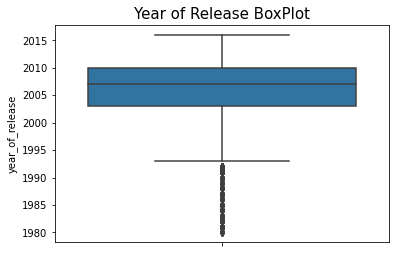

In [ ]:
sns.boxplot(y ='year_of_release', data = df)
plt.title('Year of Release BoxPlot', fontsize = 15)
plt.show()

In [ ]:
# Mengubah tipe data year_of_release
df['year_of_release'] = df['year_of_release'].astype(int)

### Menanggulangi Data yang Bermasalah Pada Kolom Critic_Score<a id='deal_with_wrong_data_critic_score_column'></a>

In [ ]:
# Melihat data pada kolom critic_score yang hilang
df.loc[(df['critic_score'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
# Menghitung persentase data yang hilang pada kolom critic_score
df['critic_score'].isnull().sum()/len(df)*100

51.258525985392644

Disini terdapat 51% data yang hilang sehingga data tidak dapat didrop begitu saja, nilai yang hilang pada kolom critic_score ini mungkin disebabkan karena gamesnya belum direview oleh kritikus. Data ini kemungkinan dapat diisi dengan nilai median/mean apabila terdapat outlier

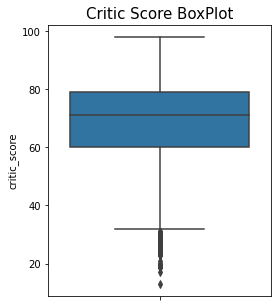

In [ ]:
# Melihat outlier nilai pada kolom critic_score
plt.figure(figsize=(4, 5))
sns.boxplot(y ='critic_score', data = df)
plt.title('Critic Score BoxPlot', fontsize = 15)
plt.show()

In [ ]:
# Membuat fungsi untuk mengisi data hilang berdasarkan nilai median
def fill_missing_value_median(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [ ]:
# Mengisi data yang hilang ddengan nilai median
df = fill_missing_value_mean(df, 'genre', 'critic_score')
df['critic_score'] = df['critic_score'].round(2)
df['critic_score'].isnull().sum()

0

### Menanggulangi Data yang Bermasalah Pada Kolom User_Score<a id='deal_with_wrong_data_user_score_column'></a>

In [ ]:
# Melihat data pada kolom user_score yang hilang
df.loc[(df['user_score'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.07,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.67,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,67.35,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.28,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,68.60,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.66,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,72.00,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,65.27,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.07,NaN,NaN


In [ ]:
# Menghitung persentase data yang hilang pada kolom user_score
df['user_score'].isnull().sum()/len(df)*100

40.03742379428986

Disini terdapat 40% data yang hilang sehingga data tidak dapat didrop begitu saja, nilai yang hilang pada kolom user_score ini mungkin disebabkan karena gamesnya belum direview oleh user. Data ini kemungkinan dapat diisi dengan nilai median/mean apabila terdapat outlier. Terdapat juga nilai TBD (To Be Determined) yang perlu diganti menjadi nilai NaN agar tipe datanya dapat dirubah karena sebenarnya data ini juga tidak dapat ditentukan nilainya.

In [ ]:
df.loc[df['user_score'] == "tbd", 'user_score']= 'NaN'

In [ ]:
# Mengubah tipe data user_score
df['user_score'] =df['user_score'].astype(float)

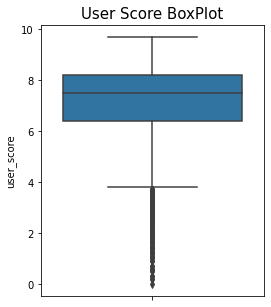

In [ ]:
# Melihat outlier nilai pada kolom user_score
plt.figure(figsize=(4, 5))
sns.boxplot(y ='user_score', data = df)
plt.title('User Score BoxPlot', fontsize = 15)
plt.show()

In [ ]:
# Mengisi data yang hilang ddengan nilai median
df = fill_missing_value_mean(df, 'genre', 'user_score')
df['user_score'] = df['critic_score'].round(2)
df['user_score'].isnull().sum()

0

### Menanggulangi Data yang Bermasalah Pada Kolom Rating<a id='deal_with_wrong_data_rating_column'></a>

In [ ]:
# Melihat data pada kolom user_score yang hilang
df.loc[(df['rating'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.07,68.07,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.67,72.67,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,67.35,67.35,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.28,70.28,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,68.60,68.60,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.66,66.66,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,72.00,72.00,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,65.27,65.27,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.07,68.07,NaN


In [ ]:
# Menghitung persentase data yang hilang pada kolom user_score
df['rating'].isnull().sum()/len(df)*100

40.4358061206012

In [ ]:
# Melihat nilai unique pada kolom rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Description:**
- E = Everyone
- M = Mature (17+)
- T = Teen (13+)
- E10+ = Everyone (10+)
- K-A = Kids to Adult (rename to E on 1998)
- AO = Adult Only (18+)
- EC = Early Child (3+)
- RP = Rating Pending ()

In [ ]:
"""# Fungsi fill_na untuk mengisi dan mengganti nilai kolom rating
def fill_na(rating):
    if rating == 'E':
        return 'E'
    elif rating == 'M':
        return 'M'
    elif rating == 'T':
        return 'T'
    elif rating == 'E10+':
        return 'E10+'
    elif rating == 'K-A':
        return 'E'
    elif rating == 'AO':
        return 'AO'
    elif rating == 'EC':
        return 'EC'
    elif rating == 'RP':
        return 'RP'
    else:
        return 'RP'"""

"# Fungsi fill_na untuk mengisi dan mengganti nilai kolom rating\ndef fill_na(rating):\n    if rating == 'E':\n        return 'E'\n    elif rating == 'M':\n        return 'M'\n    elif rating == 'T':\n        return 'T'\n    elif rating == 'E10+':\n        return 'E10+'\n    elif rating == 'K-A':\n        return 'E'\n    elif rating == 'AO':\n        return 'AO'\n    elif rating == 'EC':\n        return 'EC'\n    elif rating == 'RP':\n        return 'RP'\n    else:\n        return 'RP'"

In [ ]:
def fill_na(rating):
    if rating in ('E', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'):
        return rating
    elif rating == 'K-A':
        return 'E'
    else:
        return 'RP'

In [ ]:
df['rating'] = df['rating'].apply(fill_na)
df['rating'].isnull().sum()

0

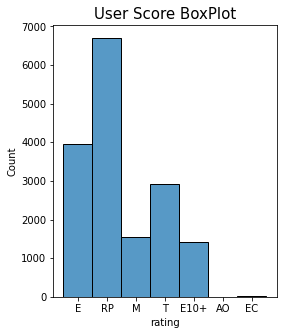

In [ ]:
# Melihat outlier nilai pada kolom user_score
plt.figure(figsize=(4, 5))
sns.histplot(x ='rating', data = df)
plt.title('User Score BoxPlot', fontsize = 15)
plt.show()

### Menghitung Jumlah Pejualan Tiap Daerah untuk Setiap Games<a id='total_sales_every_games_each_region'></a>

In [ ]:
# Membuat pivot table untuk menghitung total_sales
df_pivot = df.pivot_table(index = 'name', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').reset_index()
df_pivot['total_sales'] = df_pivot['na_sales'] + df_pivot['jp_sales'] + df_pivot['eu_sales']
df_pivot.sample(5)

,name,eu_sales,jp_sales,na_sales,total_sales
6115,MotoGP 14,0.20,0.00,0.13,0.33
1225,Call of Duty: Black Ops,9.35,0.59,17.57,27.51
6907,Opoona,0.00,0.01,0.08,0.09
10823,Wangan Midnight Portable,0.00,0.02,0.00,0.02
4212,Hyperdimension Neptunia Re;Birth 3,0.02,0.00,0.04,0.06


In [ ]:
# Membuat kolom baru pada tabel df untuk menghitung total_sales
df['total_sales'] = df['na_sales'] + df['jp_sales'] + df['eu_sales'] + df['other_sales']
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6799,TimeSplitters: Future Perfect,PS2,2005,Shooter,0.12,0.09,0.00,0.03,84.00,84.00,M,0.24
16350,Ultraman Fighting Evolution 0,PSP,2006,Fighting,0.00,0.00,0.01,0.00,69.25,69.25,RP,0.01
3244,Disney's 102 Dalmatians: Puppies to the Rescue,PS,2000,Platform,0.34,0.23,0.00,0.04,68.07,68.07,E,0.61
12211,Daniel X: The Ultimate Power,DS,2010,Action,0.06,0.00,0.00,0.00,66.66,66.66,E10+,0.06
1885,Star Wars: Bounty Hunter,PS2,2002,Shooter,0.53,0.42,0.00,0.14,65.00,65.00,T,1.09


## Analisa Data<a id='data_analysis'></a>

### Meninjau jumlah game yang dirilis tiap periode<a id='sum_of_games_released_per_year'></a>

In [ ]:
# Membuat pivot_tabel untuk meninjau berapa banyak game yang dirilis pada setiap tahunnya
df_pivot_1 = df.pivot_table(index = 'name', values = 'year_of_release', aggfunc = np.mean).reset_index()
df_pivot_1['year_of_release'] = df_pivot_1['year_of_release'].astype(int)

In [ ]:
# Melihat jumlah tahun unik
df_pivot_1['year_of_release'].nunique()

37

<AxesSubplot:xlabel='year_of_release', ylabel='Count'>

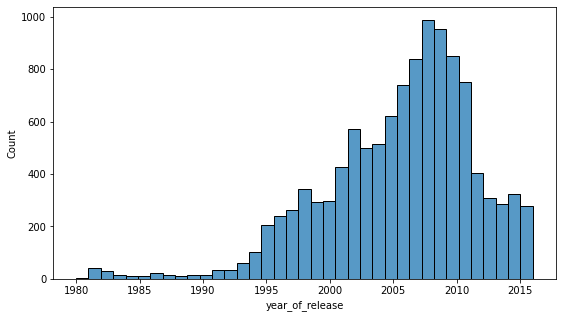

In [ ]:
# Melihat distribusi perilisan game per tahun
plt.figure(figsize=(9, 5))
sns.histplot(x ='year_of_release', data = df_pivot_1, bins = 37)

### Analisa Penjualan Platform<a id='platform_sales_analysis'></a>

In [ ]:
# Membuat pivot_tabel untuk meninjau penjualan per platform
df_pivot_2 = df.pivot_table(index = 'platform', 
                            values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                            aggfunc = 'sum').reset_index()
df_pivot_2['total_sales'] = df_pivot_2['na_sales'] + df_pivot_2['jp_sales'] + df_pivot_2['eu_sales']
df_pivot_2.sort_values(by = 'total_sales', ascending = False, inplace = True)
df_pivot_2.head(10)

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
16,PS2,337.05,137.74,580.09,192.28,1054.88
28,X360,269.79,12.33,599.15,85.34,881.27
26,Wii,261.48,69.05,494.01,78.77,824.54
17,PS3,328.97,79.52,391.60,135.10,800.09
4,DS,188.72,175.02,381.38,59.16,745.12
15,PS,212.39,139.78,334.72,40.69,686.89
6,GBA,74.82,46.56,184.73,7.62,306.11
18,PS4,141.09,15.96,108.74,48.35,265.79
19,PSP,66.68,76.38,109.09,41.42,252.15
29,XB,60.72,1.38,185.91,8.68,248.01


In [ ]:
# Membuat pivot_tabel untuk meninjau penjualan platform 'PS2' per tahun
df_pivot_3 = df.pivot_table(index = ['platform', 'year_of_release'], 
                            values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                            aggfunc = 'sum').reset_index()
df_pivot_3['total_sales'] = df_pivot_3['na_sales'] + df_pivot_3['jp_sales'] + df_pivot_3['eu_sales']
df_pivot_3.sort_values(by = 'year_of_release', ascending = True, inplace = True)

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

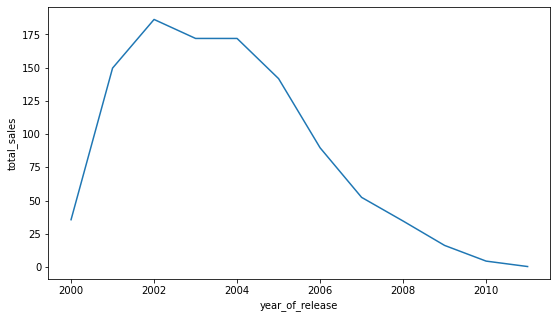

In [ ]:
# Melihat distribusi perilisan game per tahun
plt.figure(figsize=(9, 5))
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'PS2'])

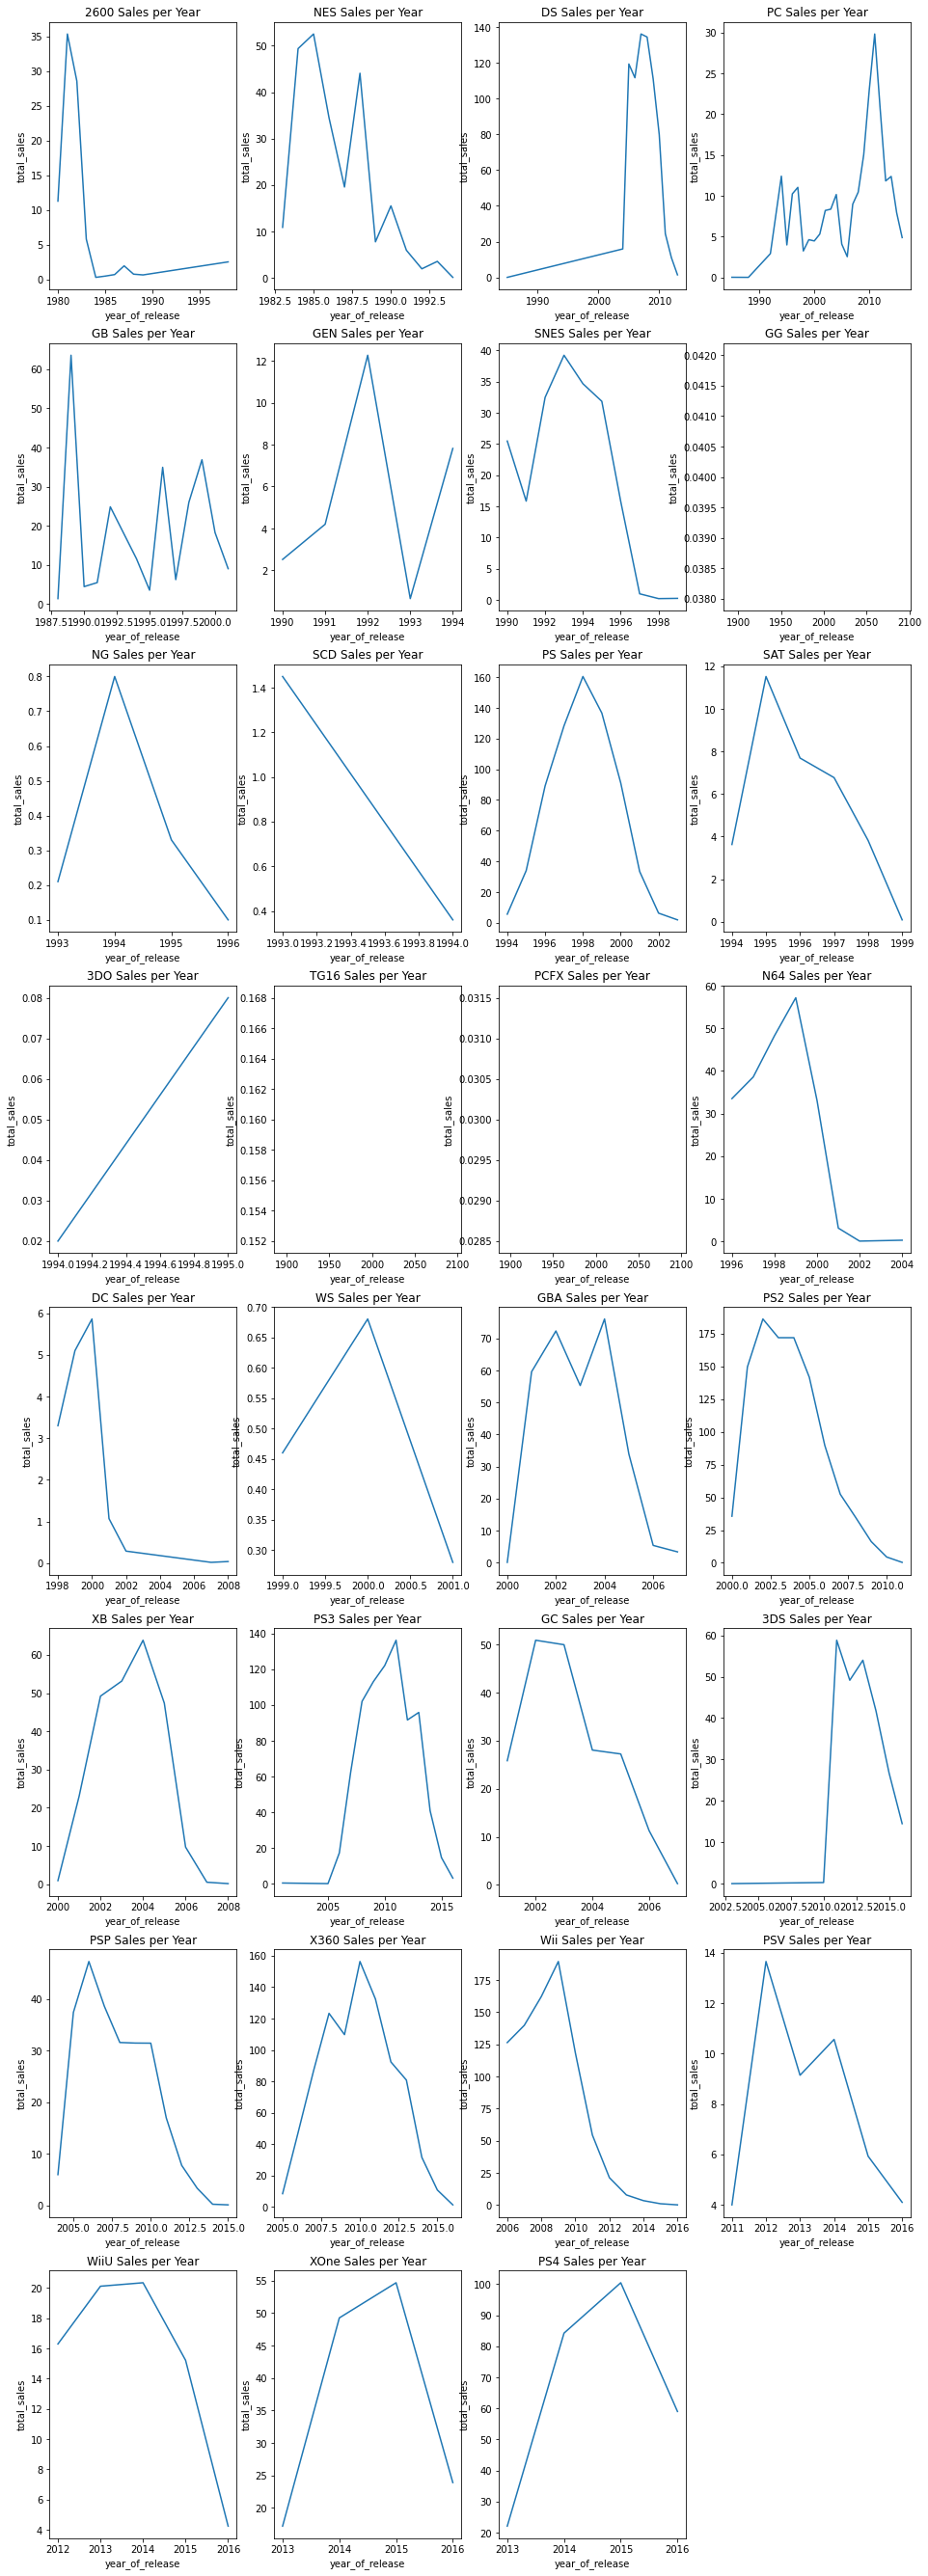

In [ ]:
# Distribusi penggunaan internet per bulan
plt.figure(figsize=(16, 48))

plt.subplot(8, 4, 1)
sns.lineplot(x = 'year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == '2600'])
plt.title('2600 Sales per Year')

plt.subplot(8, 4, 2)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'NES'])
plt.title('NES Sales per Year')

plt.subplot(8, 4, 3)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'DS'])
plt.title('DS Sales per Year')

plt.subplot(8, 4, 4)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'PC'])
plt.title('PC Sales per Year')

plt.subplot(8, 4, 5)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'GB'])
plt.title('GB Sales per Year')

plt.subplot(8, 4, 6)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'GEN'])
plt.title('GEN Sales per Year')

plt.subplot(8, 4, 7)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'SNES'])
plt.title('SNES Sales per Year')

plt.subplot(8, 4, 8)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'GG'])
plt.title('GG Sales per Year')

plt.subplot(8, 4, 9)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'NG'])
plt.title('NG Sales per Year')

plt.subplot(8, 4, 10)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'SCD'])
plt.title('SCD Sales per Year')

plt.subplot(8, 4, 11)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'PS'])
plt.title('PS Sales per Year')

plt.subplot(8, 4, 12)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'SAT'])
plt.title('SAT Sales per Year')

plt.subplot(8, 4, 13)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == '3DO'])
plt.title('3DO Sales per Year')

plt.subplot(8, 4, 14)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'TG16'])
plt.title('TG16 Sales per Year')

plt.subplot(8, 4, 15)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'PCFX'])
plt.title('PCFX Sales per Year')

plt.subplot(8, 4, 16)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'N64'])
plt.title('N64 Sales per Year')

plt.subplot(8, 4, 17)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'DC'])
plt.title('DC Sales per Year')

plt.subplot(8, 4, 18)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'WS'])
plt.title('WS Sales per Year')

plt.subplot(8, 4, 19)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'GBA'])
plt.title('GBA Sales per Year')

plt.subplot(8, 4, 20)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'PS2'])
plt.title('PS2 Sales per Year')

plt.subplot(8, 4, 21)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'XB'])
plt.title('XB Sales per Year')

plt.subplot(8, 4, 22)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'PS3'])
plt.title('PS3 Sales per Year')

plt.subplot(8, 4, 23)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'GC'])
plt.title('GC Sales per Year')

plt.subplot(8, 4, 24)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == '3DS'])
plt.title('3DS Sales per Year')

plt.subplot(8, 4, 25)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'PSP'])
plt.title('PSP Sales per Year')

plt.subplot(8, 4, 26)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'X360'])
plt.title('X360 Sales per Year')

plt.subplot(8, 4, 27)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'Wii'])
plt.title('Wii Sales per Year')

plt.subplot(8, 4, 28)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'PSV'])
plt.title('PSV Sales per Year')

plt.subplot(8, 4, 29)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'WiiU'])
plt.title('WiiU Sales per Year')

plt.subplot(8, 4, 30)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'XOne'])
plt.title('XOne Sales per Year')

plt.subplot(8, 4, 31)
sns.lineplot(x ='year_of_release', 
             y = 'total_sales', 
             data = df_pivot_3.loc[df_pivot_3['platform'] == 'PS4'])
plt.title('PS4 Sales per Year')

plt.show()

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

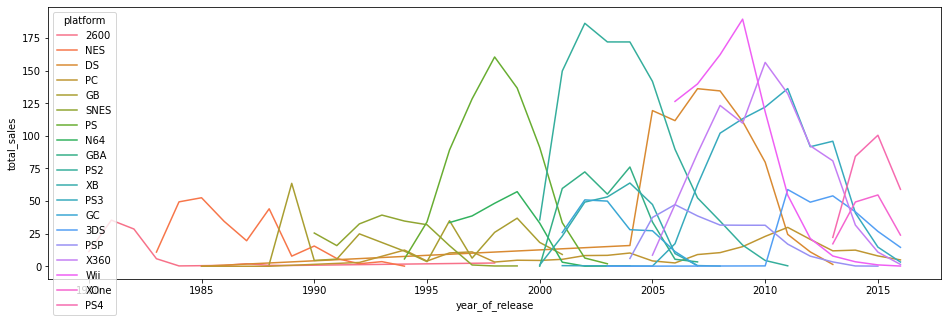

In [ ]:
# Membuat lineplot untuk melihat penjualan tiap platform yang pernah lebih besar dari 30 juta per tahun
df_pivot_4 = df_pivot_3.loc[~df_pivot_3['platform'].isin(['GEN', 'GG', 'NG', 'SCD', 'SAT', '3DO', 'TG16', 'PCFX', 'DC', 'WS',
                                                          'WS', 'PSV', 'WiiU'])]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_pivot_4, x="year_of_release", y="total_sales", hue="platform")

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

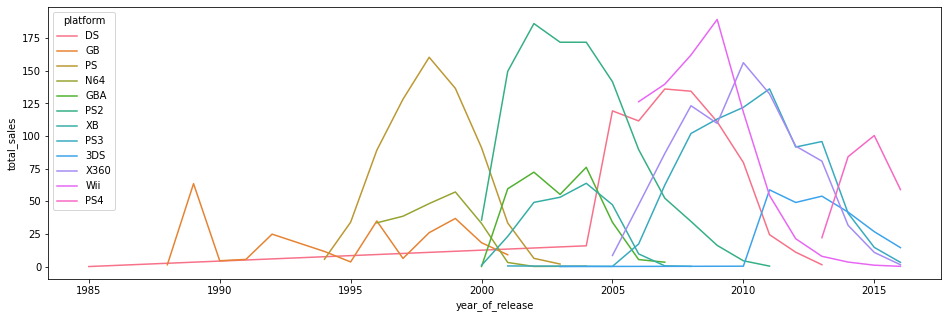

In [ ]:
# Membuat lineplot untuk melihat penjualan tiap platform yang pernah lebih besar dari 50 juta per tahun
df_pivot_4 = df_pivot_4.loc[~df_pivot_4['platform'].isin(['2600', 'NES', 'PC', 'SNES', 'GC', 'PSP', 'XOne'])]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_pivot_4, x="year_of_release", y="total_sales", hue="platform")

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

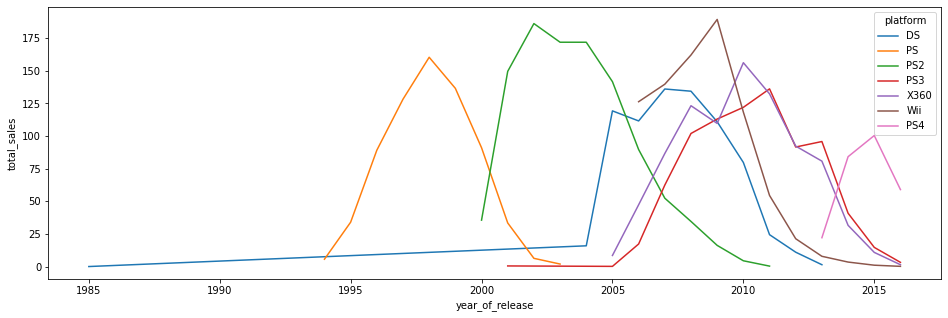

In [ ]:
# Membuat lineplot untuk melihat penjualan tiap platform yang lebih besar dari 100 juta per tahun
df_pivot_4 = df_pivot_4.loc[~df_pivot_4['platform'].isin(['GB', 'N64', 'GBA', 'XB', '3DS'])]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_pivot_4, x="year_of_release", y="total_sales", hue="platform")

**Insight:**
1. Berdasarkan data dapat terlihat bahwa jumlah game yang cenderung meningkat mulai dari tahun 1990 hingga tahun 2008 dan baru mengalami penurunan pada tahun 2009 hingga 2015

2. Berdasarkan data dapat dilihat bahwa 5 platform yang menghasilkan total penjualan terbanyak adalah PS2, X360, Wii, PS3, dan DS. Platform penjualasan terbesar adalah PS2 yang mencapai puncak penjualan pada tahun 2002 dan mengalami penurunan drastis pada tahun 2004 hingga mencapai titik nol pada tahun 2011. 

3. Terdapat beberapa platform yang dulunya sangat popular hingga pernah mencatat penjualan 100 juta dollar per tahun, tetapi karena kemunculan platform yang lebih baru tingkat penjualannya menurun hingga tidak menghasilkan penjualan sama sekali. 
    - PS mencapai puncak penjualan pada tahun 1998 dan sales terendah tercatat pada tahun 2003
    - PS2 mencapai puncak penjualan pada tahun 2002 dan sales terendah tercatat pada tahun 2012
    - DS mencapai puncak penjualan pada tahun 2007 dan sales terendah tercatat pada tahun 2013
    - Wii mencapai puncak penjualan pada tahun 2009 dan sales terendah tercatat pada tahun 2016
    - X360 mencapai puncak penjualan pada tahun 2010 dan sales terendah tercatat pada tahun 2016
    - PS3 mencapai puncak penjualan pada tahun 2011 dan sales terendah tercatat pada tahun 2016
    - PS4 mencapai puncak penjualan pada tahun 2015
    
    
4. Berdasarkan data penjualan platform yang pernah mencapai penjualan 100 juta dollar per tahun suatu platform akan memudar popularitasnya setelah 7 tahun, sedangkan popularitas dari suatu platform akan meningkat bergantung pada perusahaan yang mengembangkan platformnya. Platform PS akan booming umumnya setelah 2 tahun, tetapi untuk produk wii dan x360 baru akan meningkat popularitasnya setelah 5 tahun.

5. Sepertinya suatu platform memiliki masa popularitas sekitar 10 tahun, sehingga untuk membuat prediksi tahun 2017 pada penelitian ini akan digunakan data dari tahun 2005-2015, karena diperkirakan data tahun 2016 masih belum lengkap

In [ ]:
# Code Tambahan

In [ ]:
sales_plt = df.groupby('platform').sum().sort_values(by='total_sales', ascending=False)['total_sales'].reset_index()
sales_plt

,platform,total_sales
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.86


In [ ]:
# Platform yang akan diambil adalah yang memiliki penjualan di atas percentile 30 nya.
p30 = np.quantile(sales_plt.total_sales, 0.30)
plts = sales_plt.loc[sales_plt.total_sales > p30, 'platform']
plts

0      PS2
1     X360
2      PS3
3      Wii
4       DS
5       PS
6      PS4
7      GBA
8      PSP
9       PC
10     3DS
11      XB
12      GB
13     NES
14     N64
15    SNES
16      GC
17    XOne
18    2600
19    WiiU
20     PSV
Name: platform, dtype: object

In [ ]:
# Platform yang populer
temp = df.loc[(df['platform']).isin(plts)]

In [ ]:
# List Platform Punah
pivot_sales = pd.pivot_table(temp, columns='year_of_release', index='platform', values='total_sales', aggfunc='sum').reset_index()
pivot_sales

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.30,63.20,51.76,56.57,43.76,27.78,15.14
2,DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,...,147.23,145.36,119.56,85.35,26.33,11.67,1.54,NaN,NaN,NaN
3,GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NES,NaN,NaN,NaN,10.96,50.08,53.44,36.41,19.76,45.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,PC,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,0.03,...,9.28,12.46,17.05,26.15,35.16,23.45,13.01,13.28,8.52,5.25
9,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# List Platform Punah
platform_punah = list(pivot_sales.loc[pivot_sales[2016].isna(), 'platform'])
platform_punah

['2600',
 'DS',
 'GB',
 'GBA',
 'GC',
 'N64',
 'NES',
 'PS',
 'PS2',
 'PSP',
 'SNES',
 'XB']

In [ ]:
# Analisis data platform yang sudah punah
temp = df.loc[(df['platform']).isin(platform_punah)]
temp.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.07,68.07,RP,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.67,72.67,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,67.35,67.35,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,89.00,E,29.80
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.28,70.28,RP,28.31


In [ ]:
pivot_sales = pd.pivot_table(temp, columns='platform', 
                             index='year_of_release', 
                             values='total_sales', 
                             aggfunc='sum').reset_index()
pivot_sales

platform,year_of_release,2600,DS,GB,GBA,GC,N64,NES,PS,PS2,PSP,SNES,XB
0,1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,5.84,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN
4,1984,0.27,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN
5,1985,0.45,0.02,NaN,NaN,NaN,NaN,53.44,NaN,NaN,NaN,NaN,NaN
6,1986,0.67,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN
7,1987,1.94,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN
8,1988,0.74,NaN,1.43,NaN,NaN,NaN,45.01,NaN,NaN,NaN,NaN,NaN
9,1989,0.63,NaN,64.97,NaN,NaN,NaN,7.85,NaN,NaN,NaN,NaN,NaN


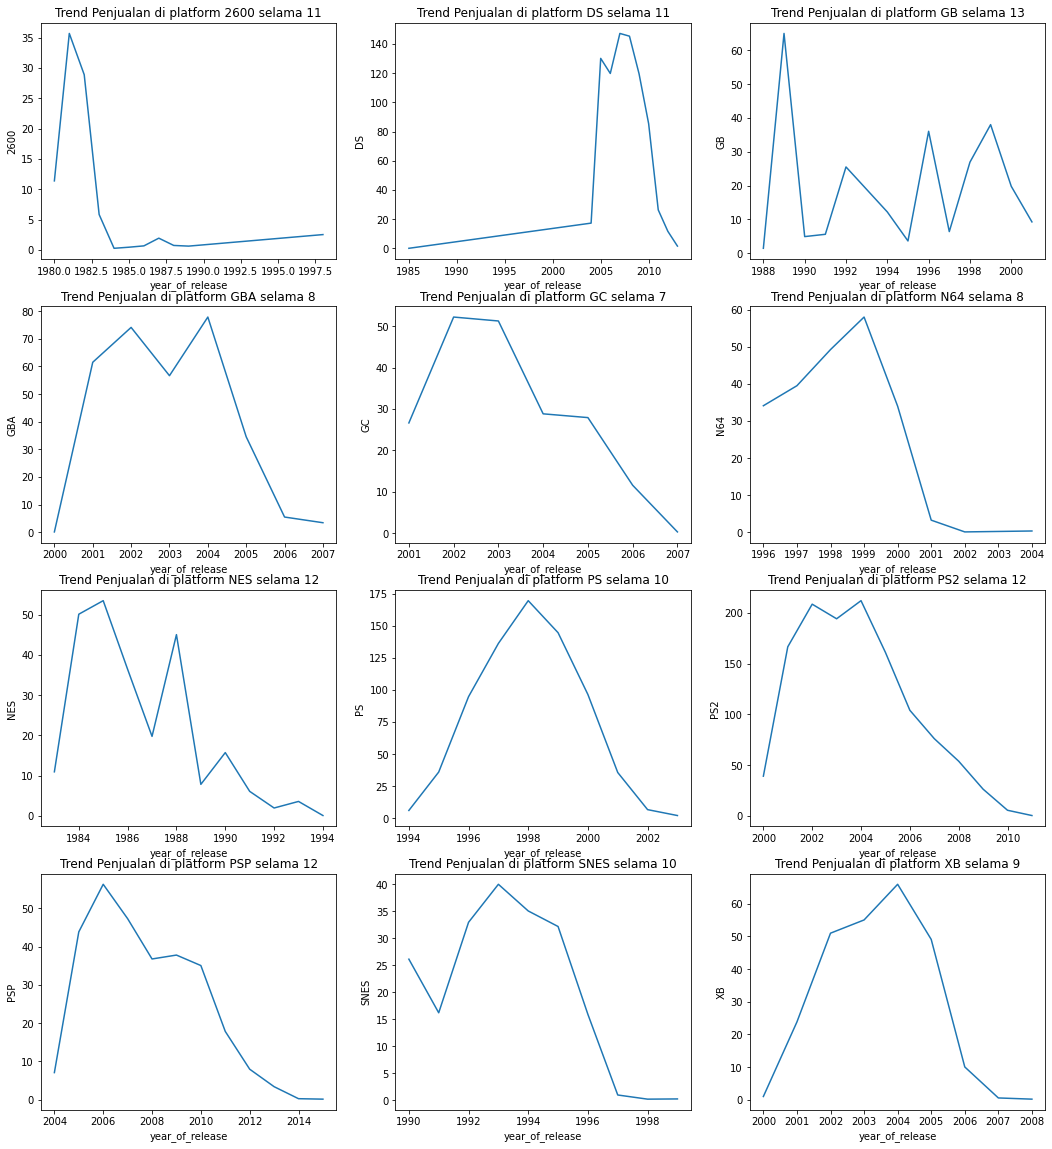

In [ ]:
plt.figure(figsize=(18, 20))
i = 1
for platform in platform_punah:
    jml_thn = pivot_sales[platform].count()
    plt.subplot(4, 3, i)
    plt.title(f'Trend Penjualan di platform {platform} selama {jml_thn}')
    sns.lineplot(data=pivot_sales, x="year_of_release", y=platform)
    i = i + 1
plt.show()

### Analisa Penjualan Platform per Tahun 2006<a id='>2006_platform_sales_analysis'></a>

In [ ]:
# Memfilter data dengan yang rilis diatas tahun 2005
df_pivot_3 = df_pivot_3.loc[(df_pivot_3['year_of_release'] >= 2005) & (df_pivot_3['year_of_release'] <= 2015)]

In [ ]:
df_pivot_3

,platform,year_of_release,eu_sales,jp_sales,na_sales,other_sales,total_sales
236,XB,2005,12.49,0.02,34.85,1.73,47.36
139,PS2,2005,40.96,15.05,85.72,19.18,141.73
30,DS,2005,41.49,29.86,47.99,10.80,119.34
164,PSP,2005,9.71,3.22,24.48,6.43,37.41
147,PS3,2005,0.14,0.01,0.00,0.04,0.15
...,...,...,...,...,...,...,...
157,PS3,2015,6.04,3.67,4.99,2.12,14.70
174,PSP,2015,0.00,0.12,0.00,0.00,0.12
161,PS4,2015,51.76,6.31,42.37,18.46,100.44
212,Wii,2015,0.62,0.00,0.43,0.09,1.05


In [ ]:
# Membuat dataframe baru untuk melihat jumlah penjualan
df_pivot_5 = df_pivot_3.pivot_table(index = 'platform', values = 'total_sales', aggfunc = {'total_sales':'sum'}).reset_index()
df_pivot_5.sort_values(by = 'total_sales', ascending = False, inplace = True)
df_pivot_5.reset_index(drop = True, inplace = True)
df_pivot_5

,platform,total_sales
0,X360,879.87
1,Wii,824.37
2,PS3,796.38
3,DS,729.19
4,PS2,339.45
5,PSP,246.17
6,3DS,230.69
7,PS4,206.78
8,PC,146.60
9,XOne,121.14


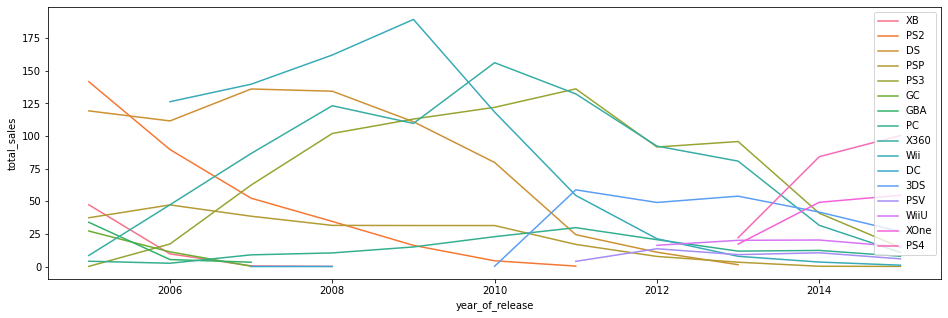

In [ ]:
# Membuat lineplot untuk melihat pergerakan total_sales tiap tahun per platform
plt.figure(figsize=(16, 5))
sns.lineplot(data = df_pivot_3, 
             x = "year_of_release", y = "total_sales", hue = "platform")
plt.legend(loc='upper right')

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

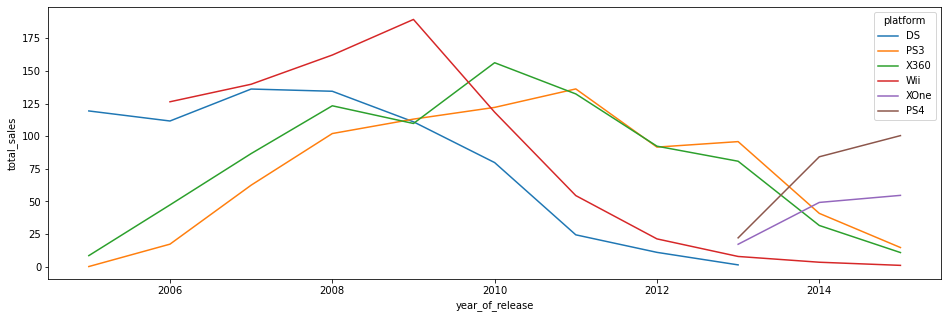

In [ ]:
# Membuat lineplot untuk melihat pergerakan total_sales tiap tahun untuk 5 platform tertinggi dan 2 platform dengan tren meningkat
df_pivot_6 = df_pivot_3.loc[~df_pivot_3['platform'].isin(['DC', 'GC', 'GBA', 'PSV', 'XB', 'WiiU', 'PC', '3DS', 'PSP', 'PS2'])]

plt.figure(figsize=(16, 5))
sns.lineplot(data = df_pivot_6, 
             x = "year_of_release", y = "total_sales", hue = "platform")

**Insight:**

Platform yang memiliki penjualan terbanyak dari tahun 2005 - 2015 adalah X360. Berdasarkan visuaslisasi dapat dilihat bahwa rata-rata penjualan tiap platform  menurun. Hal ini dapat dikatikan dengan penurunan jumlah games yang dirilis, sehingga berdasarkan tren dapat dikatakan bahwa mungkin perilisan game dapat ditunda terlebih dahulu. Tetapi jika diminta untuk memilih platform yang berpotensi untuk menghasilkan keuntungan adalah PS4 dan XOne yang masih memiliki peningkatan sales sampai tahun 2015.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

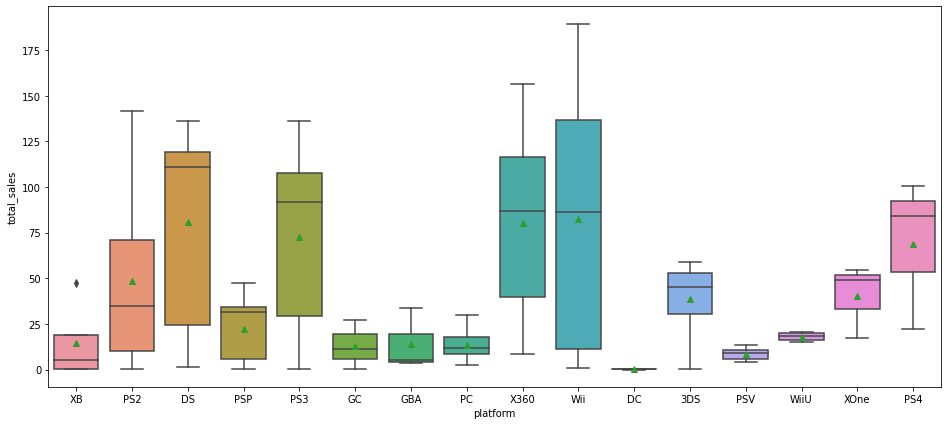

In [ ]:
# Membuat boxplot untuk melihat penjualan berdasarkan platform
plt.figure(figsize=(16, 7))
sns.boxplot(data = df_pivot_3, 
            y = "total_sales", x = "platform",
            showmeans = True)

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

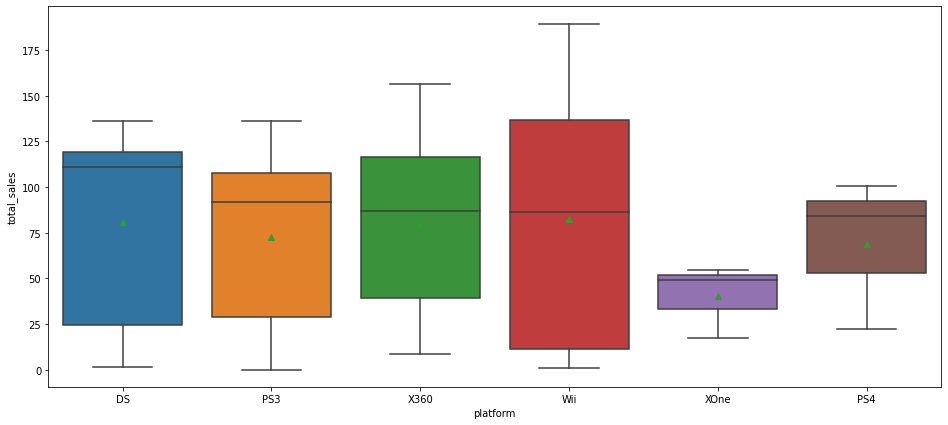

In [ ]:
# # Membuat boxplot untuk melihat penjualan berdasarkan 4 platform tertinggi dan 2 platform dengan tren meningkat
plt.figure(figsize=(16, 7))
sns.boxplot(data = df_pivot_6, 
            y = "total_sales", x = "platform",
            showmeans = True)

**Insight:**

Dilihat berdasarkan seluruh platform terdapat beberapa platform yang memiliki sales yang sangat tinggi, sedangkan platform lainnya sangat rendah tingkat penjualannya. Platform (DS, PS3, X360, Wii, dan PS4) memiliki rata-rata penjualan yang cukup mirip, sedangkan platform lainnya memiliki rata-rata penjualan yang cukup bervariasi. Penjualan PS4 dikatakan cukup bagus dengan tren meningkat hingga tahu 2015 sehingga analisa selanjutnya akan digunakna data PS4

### Analisa Korelasi Penjualan dengan Penilaian<a id='sales_vs_score_correlation'></a>

In [ ]:
# Membuat dataframe yang hanya berisikan data PS4
df_ps4 = df.loc[(df['platform'] == 'PS4') & (df['year_of_release'] >= 2005)]
df_ps4['total_sales'] = df_ps4['na_sales'] + df_ps4['eu_sales'] + df_ps4['jp_sales'] + df_ps4['other_sales']
df_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,70.28,70.28,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,97.00,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,82.00,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,70.28,70.28,RP,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.00,83.00,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.00,69.00,RP,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,65.27,65.27,RP,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.00,61.00,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.00,51.00,M,0.01


<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

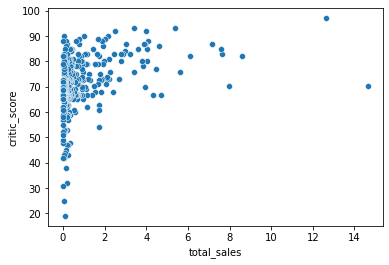

In [ ]:
# Membuat scatterplot untuk melihat korelasi antara total_sales dengan critic_score
sns.scatterplot(data = df_ps4, x = 'total_sales', y = 'critic_score')

In [ ]:
# Melihat nilai korelasi antara total_sales dengan critic_score
df_ps4['critic_score'].corr(df_ps4['total_sales'])

0.35474917441172105

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

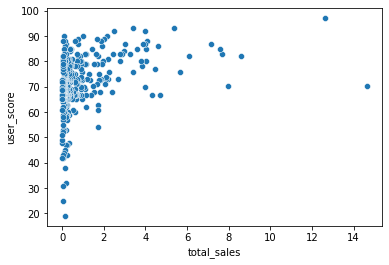

In [ ]:
# Membuat scatterplot untuk melihat korelasi antara total_sales dengan user_score
sns.scatterplot(data = df_ps4, x = 'total_sales', y = 'user_score')

In [ ]:
# Melihat nilai korelasi antara total_sales dengan critic_score
df_ps4['user_score'].corr(df_ps4['total_sales'])

0.35474917441172105

Berdasarkan hasil visualisasinya tidak terlihat adanya korelasi kuat antara user_score maupun critic_score dengan total_sales. Selanjutnya untuk memvalidasi hasil berikut saya akan menganalisa salah satu platform lainnya yang memiliki total sales tertinggi, yaitu X360.

In [ ]:
# Membuat dataframe yang hanya berisikan data X360
df_x360 = df.loc[(df['platform'] == 'X360') & (df['year_of_release'] >= 2005)]
df_x360['total_sales'] = df_x360['na_sales'] + df_x360['eu_sales'] + df_x360['jp_sales'] + df_x360['other_sales']
df_x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.00,61.00,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,97.00,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.00,88.00,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.00,87.00,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.00,83.00,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.00,49.00,T,0.01
16622,World Snooker Championship 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,72.00,72.00,RP,0.01
16647,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,66.66,66.66,M,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,66.66,66.66,E10+,0.01


<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

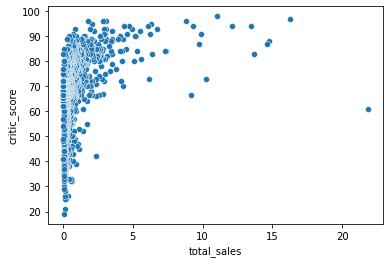

In [ ]:
# Membuat scatterplot untuk melihat korelasi antara total_sales dengan critic_score
sns.scatterplot(data = df_x360, x = 'total_sales', y = 'critic_score')

In [ ]:
# Melihat nilai korelasi antara total_sales dengan critic_score
df_x360['critic_score'].corr(df_x360['total_sales'])

0.37519286594478257

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

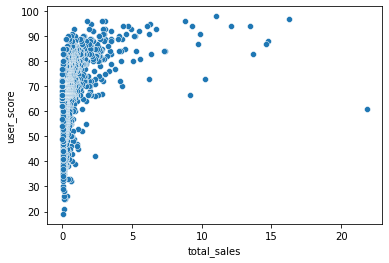

In [ ]:
# Membuat scatterplot untuk melihat korelasi antara total_sales dengan user_score
sns.scatterplot(data = df_x360, x = 'total_sales', y = 'user_score')

In [ ]:
# Melihat nilai korelasi antara total_sales dengan user_score
df_x360['user_score'].corr(df_x360['total_sales'])

0.37519286594478257

In [ ]:
# Membuat pivot_table yang dikelompokan berdasarakn genre 
df_genre = df.pivot_table(index='genre', values='total_sales', aggfunc='sum')
df_genre = df_genre.sort_values('total_sales', ascending=False)
df_genre.reset_index(inplace = True)

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

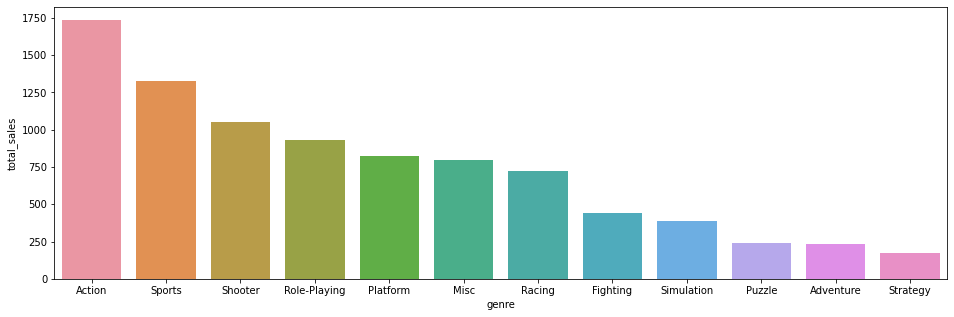

In [ ]:
# Membaut barplot untuk melihat total_sales
plt.figure(figsize=(16, 5))
sns.barplot(data = df_genre, x = 'genre', y = 'total_sales')

**Insight:**

Berdasarkan analisa menggunakan data PS4 dan X360 tidak ditemukan adanya korelasi kuat antara penilaian dengan penjualan, tetapi terdapat korelasi penjualan yang lebih kuat terhadap genre games dan genre games yang paling mendatangkan penjualan terbanyak adalah genre **Action** 

In [ ]:
#code tambahan

In [ ]:
# Membuat tabel untuk melihat korelasi antar variabel
df_corr = df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']]
df_corr.tail()

,name,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
16710,Samurai Warriors: Sanada Maru,0.00,0.00,0.01,0.0,66.66,66.66,0.01
16711,LMA Manager 2007,0.00,0.01,0.00,0.0,72.00,72.00,0.01
16712,Haitaka no Psychedelica,0.00,0.00,0.01,0.0,65.27,65.27,0.01
16713,Spirits & Spells,0.01,0.00,0.00,0.0,68.07,68.07,0.01
16714,Winning Post 8 2016,0.00,0.00,0.01,0.0,68.60,68.60,0.01


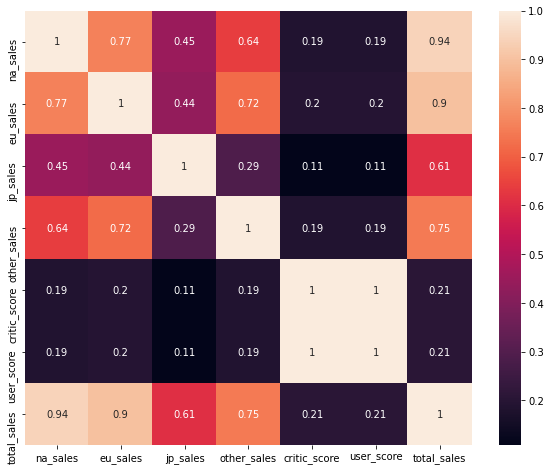

In [ ]:
# Visualisasi korelasi dengan menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

In [ ]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [ ]:
# Mendefinisikan variabel untuk visualisasi data
platforms = df['platform'].unique()
n_platforms = df['platform'].nunique()
cols = ['name', 'platform', 'critic_score', 'user_score', 'total_sales']
platforms

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
data = df

In [ ]:
def corr_platform (data, cols, n_platform, platforms, length, height):
    plt.figure(figsize=(3*length, 11*height))
    for i in range(n_platform):
        platform = platforms[i]

        korelasi = data.loc[data['platform']==platform, cols]

        plt.subplot(11, 3, i+1)
        plt.title(f'Korelasi di platform {platform}')
        sns.heatmap(korelasi.corr(), annot=True)

    plt.show()

In [ ]:
corr_platform (data=data, cols=cols, n_platform=n_platform, platforms=platforms, length=5, height=4)

NameError: name 'n_platform' is not defined

## Pemrofilan Pengguna per Wilayah<a id='user_profiling_by_region'></a>

### Platform Teratas Berdasarkan Wilayah<a id='top_platform_by_region'></a>

In [ ]:
# Membuat pivot_table untuk pemrofilan pengguna per wilayah
df_platform = df.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

In [ ]:
# Platform dengan sales tertinggi di daerah NA
na_platform = df_platform.sort_values('na_sales', ascending=False).head()
na_platform

In [ ]:
# Platform dengan sales tertinggi di daerah EU
eu_platform = df_platform.sort_values('eu_sales', ascending=False).head()
eu_platform

In [ ]:
# Platform dengan sales tertinggi di daerah JP
jp_platform = df_platform.sort_values('jp_sales', ascending=False).reset_index().head()
jp_platform

**Insight:**
1. Setiap daerah memiliki prefensi penggunaan platform yang berbeda-beda dengan penjabaran sebagai berikut:
    - NA = X360, PS2, Wii, PS3, dan DS
    - EU = PS2, PS3, X360, Wii, dan PS
    - JP = DS, PS, PS2, SNES, dan 3DS
2. Berdasarkan data dapat terlihat juga bahwa PS2 ternyata memiliki sales yang cukup baik pada tiap wilayah
3. Platform dengan sales tertinggi berada pada daerah NA 

### Genre Teratas Berdasarkan Wilayah<a id='top_genre_by_region'></a>

In [ ]:
# Membuat pivot_table untuk pemrofilan pengguna per wilayah
df_genre = df.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

In [ ]:
# Platform dengan sales tertinggi di daerah NA
na_genre = df_genre.sort_values('na_sales', ascending=False).head()
na_genre

In [ ]:
# Platform dengan sales tertinggi di daerah EU
eu_genre = df_genre.sort_values('eu_sales', ascending=False).head()
eu_genre

In [ ]:
# Platform dengan sales tertinggi di daerah JP
jp_genre = df_genre.sort_values('jp_sales', ascending=False).head()
jp_genre

**Insight:**
1. Setiap daerah memiliki prefensi genre mirip dengan penjabaran sebagai berikut:
    - NA = Action, Sports, Shooter, Platform, Misc
    - EU = Action, Sports, Shooter, Racing, Misc
    - JP = Role-Playing, Action, Sports, Platform, Misc
2. Berdasarkan data dapat terlihat juga bahwa games bergenre action ternyata memiliki sales yang cukup baik pada tiap wilayah
3. Daerah NA dan EU memiliki preferensi genre yang mirip

In [ ]:
# Code Tambahan

In [ ]:
genres = data['genre'].unique()
genres = genres[~pd.isnull(genres)]
genre_sales = pd.pivot_table(df, index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').T.reset_index()
genre_sales

In [ ]:
i = 1
plt.figure(figsize=(20, 15))
# plotting data on chart
for genre in genres:
    plt.subplot(3, 4, i)
    plt.title(f'Sales Proportion on {genre}')
    plt.pie(genre_sales[genre], labels=genre_sales['index'], autopct='%.0f%%')
    i = i + 1 

# displaying chart
plt.show()

### Pengaruh Rating ESRB<a id='esrb_rating_impact'></a>

In [ ]:
# Membuat pivot_table untuk pemrofilan pengguna per wilayah
df_esrb = df.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales', 'total_sales'], aggfunc='sum')
df_esrb

In [ ]:
# Rating dengan sales tertinggi di daerah NA
na_esrb = df_esrb.sort_values('na_sales', ascending=False).head()
na_esrb

In [ ]:
# Rating dengan sales tertinggi di daerah EU
eu_esrb = df_esrb.sort_values('eu_sales', ascending=False).head()
eu_esrb

In [ ]:
# Rating dengan sales tertinggi di daerah EU
jp_esrb = df_esrb.sort_values('jp_sales', ascending=False).head()
jp_esrb

**Description:**
- E = Everyone
- M = Mature (17+)
- T = Teen (13+)
- E10+ = Everyone (10+)
- K-A = Kids to Adult (rename to E on 1998)
- AO = Adult Only (18+)
- EC = Early Child (3+)
- RP = Rating Pending ()

**Insight:**
1. Total penjualan tertinggi adalah games dengan rating E (Everyone), T (Teen 13+), dan M (Mature 17+)
2. Rating ESRB ternyata cukup berpengaruh terhadap penjualan game, karena games yang memiliki Rating E memiliki penjualan yang baik untuk tiap daerah dan hasilnya relatif sama antara daerah NA, EU, dan JP

## Menguji Hipotesis <a id='hypotesis_testing'></a>

### Rata-rata rating pengguna platform Xbox One dan PC adalah sama. <a id='user_score_for_xone_pc'></a>

Hipotesis nol umumnya adalah hipotesis yang menyatakan sesuatu yang akan diuji adalah sama, sehingga nilai 

H0: Rata-rata rating pengguna platform Xbox One dan PC **sama**

H1: Rata-rata rating pengguna platform Xbox One dan PC **tidak sama**

Kriteria pengujian hipoetesis yang saya gunakan adalah pengujian rata-rata untuk 2 populasi karena samplenya merupakan 2 populasi yang berbeda 

In [ ]:
# Memfilter data
xbox_user_rating = df.query('platform == "XOne"')['user_score'].reset_index()
pc_user_rating = df.query('platform == "PC"')['user_score'].reset_index()

In [ ]:
# Melihat perbedaan nilai variasi rating antara xbox dan pc
np.var(xbox_user_rating['user_score']), np.var(pc_user_rating['user_score'])

In [ ]:
# Menghitung persentase perbedaan nilai varian
(np.var(xbox_user_rating['user_score']) - np.var(pc_user_rating['user_score']))/np.var(xbox_user_rating['user_score'])*100

In [ ]:
# Menghitung perbedaan varian rating xbox dan pc
st.levene(xbox_user_rating['user_score'], pc_user_rating['user_score']) 

In [ ]:
# Melakukan pengujian hipotesis
alpha = 0.05

results_usr = st.ttest_ind(xbox_user_rating['user_score'], pc_user_rating['user_score'], equal_var = True)

print('p-value:', results_usr.pvalue)

if (results_usr.pvalue < alpha):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

### Rata-rata rating pengguna genre Action dan Sports adalah sama. <a id='user_score_for_action_sports'></a>

Hipotesis nol umumnya adalah hipotesis yang menyatakan sesuatu yang akan diuji adalah sama, sehingga nilai 

H0: Rata-rata rating pengguna genre Action dan Sports **sama**

H1: Rata-rata rating pengguna genre Action dan Sports **tidak sama**

Kriteria pengujian hipoetesis yang saya gunakan adalah pengujian rata-rata untuk 2 populasi karena samplenya merupakan 2 populasi yang berbeda 

In [ ]:
# Memfilter data
action_rating = df.query('genre == "Action"')['user_score'].reset_index()
sports_rating = df.query('genre == "Sports"')['user_score'].reset_index()

In [ ]:
# Melihat perbedaan nilai variasi rating antara genre action dan sports
np.var(action_rating['user_score']), np.var(sports_rating['user_score'])

In [ ]:
# Menghitung persentase perbedaan nilai varian
(np.var(action_rating['user_score']) - np.var(sports_rating['user_score']))/np.var(action_rating['user_score'])*100

In [ ]:
# Menghitung perbedaan varian rating genre action dan sports
st.levene(action_rating['user_score'], sports_rating['user_score'])  

In [ ]:
# Melakukan pengujian hipotesis
alpha = 0.05

results_usr = st.ttest_ind(action_rating['user_score'], sports_rating['user_score'], equal_var = False)

print('p-value:', results_usr.pvalue)

if (results_usr.pvalue < alpha):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

## Kesimpulan <a id='summary'></a>

Berdasarkan data, perilisan game memang menurun sejak mencapai puncaknya, yaitu pada tahun 2008 dan begitu pun total penjualannya. Tetapi jika tim marketing ingin mempromosikan games terdapat beberapa saran yang dapat saya berikan, sebagai berikut:
- Kampanye dapat dilakukan untuk games yang berada pada platform PS4 dan XOne yang masih memiliki tren pertumbuhan penjualan
- Kampanye dilakukan untuk games dengan genre "Action" yang memiliki rating "E (Everyone)" dengan market NA
- Rating dari kritikus dan pengguna game dapat dikatakan tidak memeiliki korelasi kuat dengan penjualan
- Hasil pengujian hipotesis adalah rata-rata rating pengguna platform XBox One dengan PC berbeda dan rata-rata rating pengguna genre Action dan Sports berbeda
- Setiap daerah memiliki prefensi penggunaan platform yang berbeda-beda dengan penjabaran sebagai berikut:
    - NA = X360, PS2, Wii, PS3, dan DS
    - EU = PS2, PS3, X360, Wii, dan PS
    - JP = DS, PS, PS2, SNES, dan 3DS
- Setiap daerah memiliki prefensi genre mirip dengan penjabaran sebagai berikut:
    - NA = Action, Sports, Shooter, Platform, Misc
    - EU = Action, Sports, Shooter, Racing, Misc
    - JP = Role-Playing, Action, Sports, Platform, Misc


**Notes:**
Kesimpulan ini diambil dengan asumsi dan pengamatan data bahwa suatu platform akan bertahan popularitasnya selama 10 tahun dan data yang digunakan hanyalah data dari tahun 2005 - 2015

**Based on the analysis, the marketing team can consider the following recommendations:**
1.	Platform Selection: Based on the data, it is recommended to focus on promoting games on the PS4 and XOne platforms, as they are still showing growth in sales.
2.	Genre and Rating Selection: It is recommended to focus on promoting games in the "Action" genre with an "E (Everyone)" rating, especially in the North American market. This genre and rating combination has shown consistent popularity across all regions.
3.	Regional Preferences: It is important to consider the different preferences in platform usage and genre across regions.
4.	Timing of Promotion: Based on the observation, promoting games on platforms that have been out for a longer time, such as the PS4 and XOne, could be more beneficial than promoting games on newer platforms.
